# Tutorial 6. Clustering

## Agenda: 
1. K-means clustering `KMeans`
2. Clustering evaluation
2. Hierarchical clustering `AgglomerativeClustering`

In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering

## Data: 20 beers
- attributes: calories, sodium, alcohol, cost

In [2]:
# beer dataset
import pandas as pd

beer = pd.read_csv('beer.txt', sep=' ') # this file separated by ' ', not comma
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


We will cluster 20 beers with 4 attributes.

In [3]:
# define X
X = beer.drop('name', axis=1)
names = beer.name

Normalize feature scales to prevent a large-scale feature dominates the clustering results!

In [4]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 1. K-means clustering

In [5]:
# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=1)

In [6]:
# review the cluster labels
km.labels_

array([0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1],
      dtype=int32)

In [7]:
# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer.sort_values(by='cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
12,Michelob_Light,135,11,4.2,0.50,1


What are the "characteristics" of each cluster?

In [8]:
# review the cluster centers
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,148.375,21.125,4.7875,0.4075
1,105.375,10.875,3.3250,0.4475
2,155.250,10.750,4.9750,0.7625


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


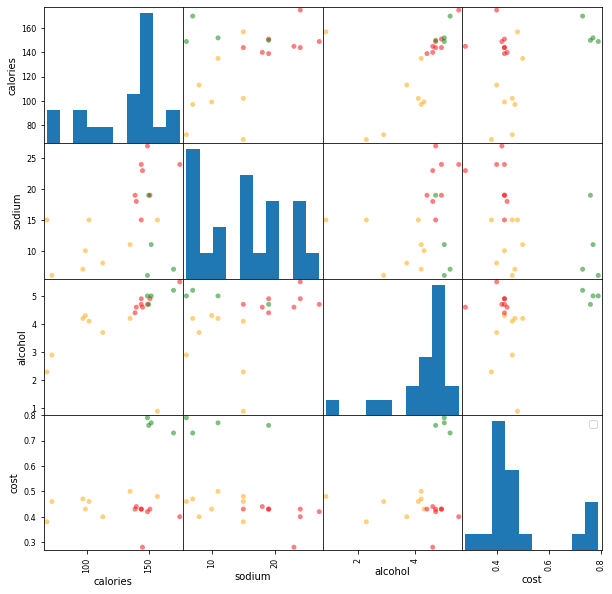

In [9]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'orange', 'green', 'blue', 'purple'])

# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
from matplotlib import pyplot as plt
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], label=beer.cluster, figsize=(10,10), s=100)
plt.legend()

## 2. Clustering Evaluation

Do you notice any cluster assignments that seem a bit odd? How might we explain those?

To evaluate clustering "performance" in situations when the "true" cluster assignments are not known, we can use those two common metrics below:

1. **WSS (Within-cluster Sum of Squares)**: 
- Sum of squared distances between data sample and their cluster centroids. 
- we can obtain WSS from `.inertia_` attribute. The lower the better. 
- Use elbow method to find the optimal number of clusters.

2. **Silhouette Coefficient**: for each observation, silhouette score $SC$ is calculated by

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A global score is calculated by taking the mean score for all observations.

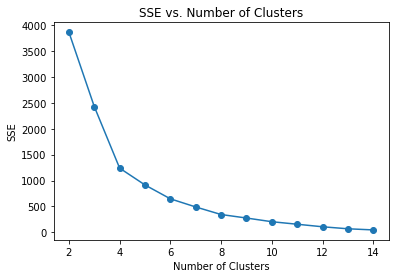

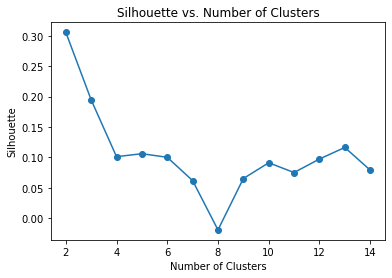

In [10]:
from sklearn.metrics import silhouette_score

numClusters = range(2, 15)
SSE = []
silhouette = []
for k in numClusters:
    k_means = KMeans(n_clusters=k, random_state=1)
    k_means.fit(X)
    SSE.append(k_means.inertia_)
    sil = silhouette_score(X_scaled, k_means.labels_)
    silhouette.append(sil)


import matplotlib.pyplot as plt
plt.plot(numClusters, SSE, marker='o')
plt.title('SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

plt.plot(numClusters, silhouette, marker='o')
plt.title('Silhouette vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette')
plt.show()

Choose the number of clusters `k=4`!

In [11]:
k_means = KMeans(n_clusters=4, random_state=1)
k_means.fit(X)
beer['cluster'] = k_means.labels_
beer.sort_values(by='cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
16,Hamms,139,19,4.4,0.43,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
14,Kirin,149,6,5.0,0.79,0
13,Becks,150,19,4.7,0.76,0


In [12]:
# review the cluster centers
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,146.25,17.25,4.383333,0.513333
1,102.75,10.00,4.075000,0.440000
2,172.50,15.50,5.350000,0.565000
3,70.00,10.50,2.600000,0.420000


array([[<AxesSubplot:xlabel='calories', ylabel='calories'>,
        <AxesSubplot:xlabel='sodium', ylabel='calories'>,
        <AxesSubplot:xlabel='alcohol', ylabel='calories'>,
        <AxesSubplot:xlabel='cost', ylabel='calories'>],
       [<AxesSubplot:xlabel='calories', ylabel='sodium'>,
        <AxesSubplot:xlabel='sodium', ylabel='sodium'>,
        <AxesSubplot:xlabel='alcohol', ylabel='sodium'>,
        <AxesSubplot:xlabel='cost', ylabel='sodium'>],
       [<AxesSubplot:xlabel='calories', ylabel='alcohol'>,
        <AxesSubplot:xlabel='sodium', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='cost', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='calories', ylabel='cost'>,
        <AxesSubplot:xlabel='sodium', ylabel='cost'>,
        <AxesSubplot:xlabel='alcohol', ylabel='cost'>,
        <AxesSubplot:xlabel='cost', ylabel='cost'>]], dtype=object)

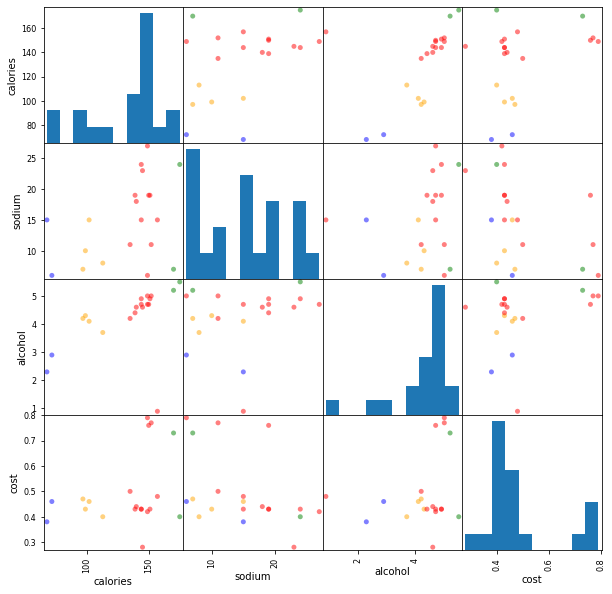

In [13]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'orange', 'green', 'blue', 'purple'])

# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
from matplotlib import pyplot as plt
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], label=beer.cluster, figsize=(10,10), s=100)

## 3. Hierarchical Clustering

We first define a function to visualize dendrogram.

In [14]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np

def plot_dendrogram(model, figsize=(10, 5), **kwargs):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, 
                                      model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    plt.figure(figsize=figsize)
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Hierarchical Clustering Dendrogram')
    if 'labels' not in kwargs:
        xlabel = "Number of points in node (or index of point if no parenthesis)."
    else:
        xlabel = "Data Sample"
    ylabel = "Distance"
    if 'orientation' in kwargs and kwargs['orientation'] == 'right':
        plt.xlabel(ylabel)
        plt.ylabel(xlabel)
    else:
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

Average linkage.

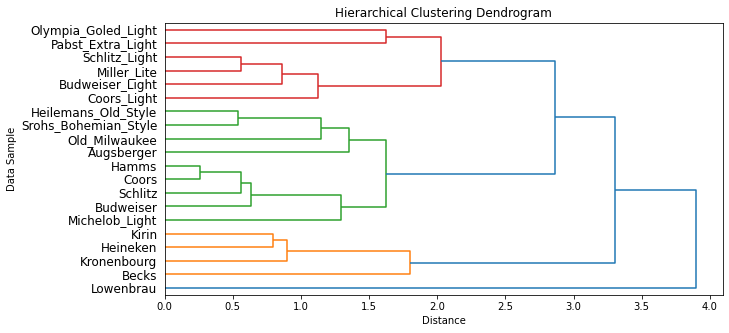

In [15]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='average')
model.fit(X_scaled)
plot_dendrogram(model, labels=names.tolist(), orientation='right')

`n_clusters=4` will be okay!

In [16]:
# hierarchical clustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
model.fit(X_scaled)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [17]:
beer['cluster_hierarchical'] = model.labels_ # hierarchical clustering label results
beer.sort_values('cluster_hierarchical')

,name,calories,sodium,alcohol,cost,cluster,cluster_hierarchical
9,Budweiser_Light,113,8,3.7,0.40,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,3,0
11,Coors_Light,102,15,4.1,0.46,1,0
18,Olympia_Goled_Light,72,6,2.9,0.46,3,0
8,Miller_Lite,99,10,4.3,0.43,1,0
19,Schlitz_Light,97,7,4.2,0.47,1,0
6,Augsberger,175,24,5.5,0.40,2,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
10,Coors,140,18,4.6,0.44,0,1
12,Michelob_Light,135,11,4.2,0.50,0,1


array([[<AxesSubplot:xlabel='calories', ylabel='calories'>,
        <AxesSubplot:xlabel='sodium', ylabel='calories'>,
        <AxesSubplot:xlabel='alcohol', ylabel='calories'>,
        <AxesSubplot:xlabel='cost', ylabel='calories'>],
       [<AxesSubplot:xlabel='calories', ylabel='sodium'>,
        <AxesSubplot:xlabel='sodium', ylabel='sodium'>,
        <AxesSubplot:xlabel='alcohol', ylabel='sodium'>,
        <AxesSubplot:xlabel='cost', ylabel='sodium'>],
       [<AxesSubplot:xlabel='calories', ylabel='alcohol'>,
        <AxesSubplot:xlabel='sodium', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='cost', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='calories', ylabel='cost'>,
        <AxesSubplot:xlabel='sodium', ylabel='cost'>,
        <AxesSubplot:xlabel='alcohol', ylabel='cost'>,
        <AxesSubplot:xlabel='cost', ylabel='cost'>]], dtype=object)

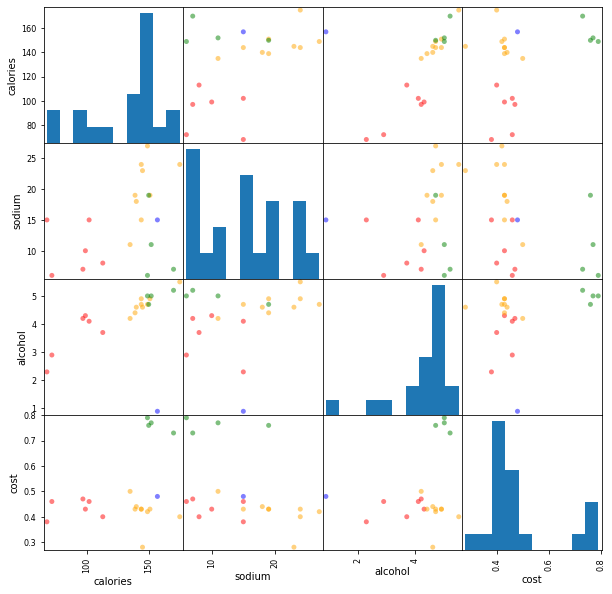

In [18]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'orange', 'green', 'blue', 'purple'])

# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
from matplotlib import pyplot as plt
pd.plotting.scatter_matrix(X, c=colors[beer.cluster_hierarchical], label=beer.cluster_hierarchical, figsize=(10,10), s=100)